<a href="https://colab.research.google.com/github/AdityaVerma2809/Machine-Learning/blob/main/MobilenetV2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224,224)

# Define input layer
inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,))

# Wrap hub.KerasLayer in a Lambda layer
outputs = tf.keras.layers.Lambda(
    lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", trainable=False)(x)
)(inputs)

# Create the model
classifier = tf.keras.Model(inputs, outputs)

# Print model summary
classifier.summary()

# IMAGE_SHAPE = (112, 112)

# # Define input layer
# inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,))

# # Wrap hub.KerasLayer in a Lambda layer AND specify the output_shape
# outputs = tf.keras.layers.Lambda(
#     lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", trainable=False)(x),
#     output_shape=(1000,) # <-- This explicitly fixes the error
# )(inputs)

# # Create the model
# classifier = tf.keras.Model(inputs, outputs)

# # Print model summary
# classifier.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
image_count=len(list(data_dir.glob("*/*/*.jpg")))

In [8]:
roses=list(data_dir.glob("*/roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/410421672_563550467c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5273722065_c85d8543c2_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3422228549_f147d6e642.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4243078361_7b92a932cd_n.jpg')]

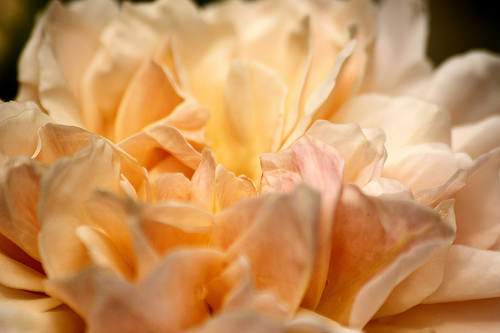

In [9]:
Image.open(roses[99])

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(375, 500, 3)

In [13]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

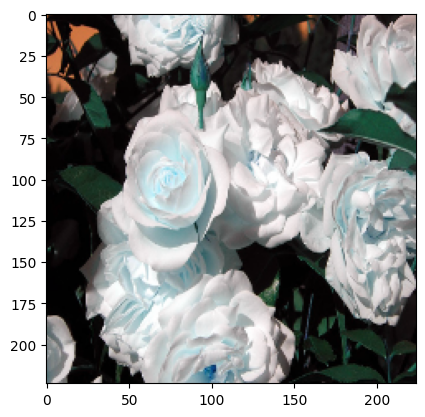

In [14]:
plt.imshow(cv2.resize(img,(224,224)))

In [15]:
x,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(IMAGE_SHAPE))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [18]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [19]:
x_train_scaled[0]

array([[[0.10588235, 0.44705882, 0.35294118],
        [0.1254902 , 0.47058824, 0.37647059],
        [0.14509804, 0.49803922, 0.40784314],
        ...,
        [0.34117647, 0.60392157, 0.52156863],
        [0.38039216, 0.64313725, 0.56078431],
        [0.40784314, 0.67058824, 0.58823529]],

       [[0.09019608, 0.43529412, 0.34117647],
        [0.11372549, 0.46666667, 0.36862745],
        [0.13333333, 0.49019608, 0.4       ],
        ...,
        [0.36078431, 0.63137255, 0.54901961],
        [0.39607843, 0.66666667, 0.58431373],
        [0.42352941, 0.69411765, 0.61176471]],

       [[0.0745098 , 0.43137255, 0.33333333],
        [0.10196078, 0.45882353, 0.36078431],
        [0.12156863, 0.48235294, 0.38823529],
        ...,
        [0.37254902, 0.65490196, 0.56862745],
        [0.4       , 0.68235294, 0.59607843],
        [0.43137255, 0.70980392, 0.62352941]],

       ...,

       [[0.01568627, 0.27843137, 0.24313725],
        [0.00784314, 0.25490196, 0.22352941],
        [0.00392157, 0

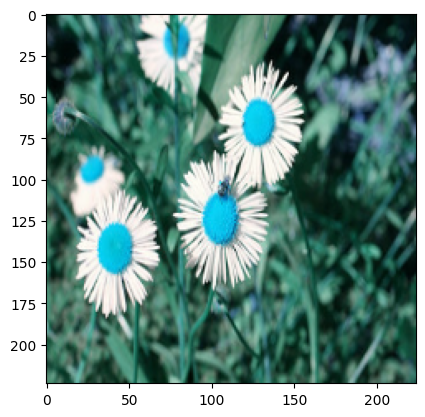

In [20]:
plt.imshow(x[777])

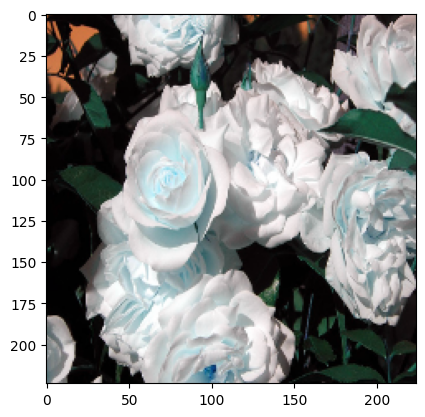

In [21]:
plt.imshow(x[0])

In [22]:
predicted=classifier.predict(np.array([x[0],x[777]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


array([722, 795])

In [23]:
image_labels[722]

'pillow'

In [24]:
image_labels[795]

'shower curtain'

In [25]:
num_classes=5
model=tf.keras.Sequential([
    classifier,
    tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,010 (19.57 KB)

 Trainable params: 5,010 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.6013 - loss: 1.1594
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8451 - loss: 0.4234
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9072 - loss: 0.2753
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9019 - loss: 0.2809
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9180 - loss: 0.2274
